In [1]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Implement Jaynes-Cummings model simulation

## Set constant values

In [2]:
c1 = 1
c2 = 1
d = 1
t = 0.1

## Displacement parameters

In [3]:
d1 = (-1j * d * t) / 2
d2 = (d * t) / 2

## Instantiate the circuit

In [4]:
import c2qa
import qiskit


qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=4)
qr = qiskit.QuantumRegister(size=2)
cr = qiskit.ClassicalRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qr, cr)

circuit.rz(-1 * c1 * t, qr[0])
circuit.rz(-1 * c2 * t, qr[1])
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])
circuit.cx(qr[0], qr[1], ctrl_state=0)
circuit.cv_cnd_d(d1, d1, qr[1], qmr[0], beta_dagger=True)
circuit.cx(qr[0], qr[1])
circuit.cv_cnd_d(d1, d1, qr[0], qmr[0], beta_dagger=True)
circuit.h(qr[0])
circuit.sdg(qr[0])
circuit.h(qr[0])
circuit.cx(qr[0], qr[1], ctrl_state=0)
circuit.cv_cnd_d(d2, d2, qr[1], qmr[0], beta_dagger=True)
circuit.cx(qr[0], qr[1])
circuit.cv_cnd_d(d2, d2, qr[0], qmr[0], beta_dagger=True)
circuit.h(qr[0])
circuit.s(qr[0])
circuit.cx(qr[0], qr[1])

c:\Users\stav405\git\c2qa-qiskit\venv\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
c:\Users\stav405\git\c2qa-qiskit\venv\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
c:\Users\stav405\git\c2qa-qiskit\venv\lib\site-packages\qiskit\extensions\quantum_initializer\squ.py:143: RuntimeWarning: invalid value encountered in arccos
  beta = 2 * np.arccos(np.abs(u00))


## Simulate the circuit

In [8]:
state, result = c2qa.util.simulate(circuit)

## Animate the circuit

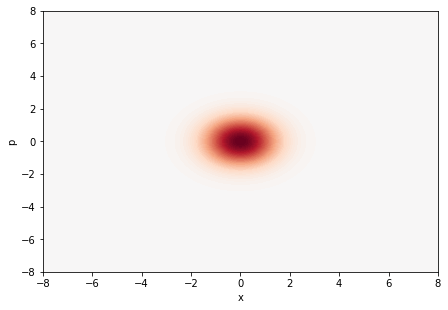

In [5]:
anim = c2qa.util.animate_wigner(
    circuit,
    qubit=qr[0],
    cbit=cr[0],
    axes_min=-8,
    axes_max=8,
    animation_segments=48,
    shots=128
)

In [6]:
c2qa.util.save_animation(anim, "jaynes-cummings.gif")

In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())